# **Limpieza de datos**

In [ ]:
install.packages("arrow")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘assertthat’




In [ ]:
#Librerias necesarias
library(ggplot2)
library(dplyr)
library(arrow)
library(lubridate)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp



Attaching package: ‘lubridate’


The following object is masked from ‘package:arrow’:

    duration


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [ ]:
historicos <- read_parquet('https://geronimofretes.github.io/infovis/data/precios_historicos.parquet')

In [ ]:
colnames(historicos)

[1] "idempresa"        "empresa"          "direccion"        "localidad"       
 [5] "provincia"        "idproducto"       "producto"         "idtipohorario"   
 [9] "tipohorario"      "precio"           "fecha_vigencia"   "idempresabandera"
[13] "empresabandera"   "latitud"          "longitud"         "geojson"

In [ ]:
str(historicos)

tibble [2,854,281 × 16] (S3: tbl_df/tbl/data.frame)
 $ idempresa       : int [1:2854281] 1376 1376 1376 1376 1376 1376 1376 1376 1376 1376 ...
 $ empresa         : chr [1:2854281] "10 DE SETIEMBRE S.A." "10 DE SETIEMBRE S.A." "10 DE SETIEMBRE S.A." "10 DE SETIEMBRE S.A." ...
 $ direccion       : chr [1:2854281] "Av. Mosconi 299" "Av. Mosconi 299" "Av. Mosconi 299" "Av. Mosconi 299" ...
 $ localidad       : chr [1:2854281] "LOMAS DEL MIRADOR" "LOMAS DEL MIRADOR" "LOMAS DEL MIRADOR" "LOMAS DEL MIRADOR" ...
 $ provincia       : chr [1:2854281] "BUENOS AIRES" "BUENOS AIRES" "BUENOS AIRES" "BUENOS AIRES" ...
 $ idproducto      : int [1:2854281] 19 19 19 19 19 19 19 19 19 19 ...
 $ producto        : chr [1:2854281] "Gas Oil Grado 2" "Gas Oil Grado 2" "Gas Oil Grado 2" "Gas Oil Grado 2" ...
 $ idtipohorario   : int [1:2854281] 2 3 2 3 2 3 2 3 2 3 ...
 $ tipohorario     : chr [1:2854281] "Diurno" "Nocturno" "Diurno" "Nocturno" ...
 $ precio          : num [1:2854281] 985 985 1080 1080 1108 ...

In [ ]:
head(historicos)

idempresa,empresa,direccion,localidad,provincia,idproducto,producto,idtipohorario,tipohorario,precio,fecha_vigencia,idempresabandera,empresabandera,latitud,longitud,geojson
<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
1376,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,19,Gas Oil Grado 2,2,Diurno,985,01/04/2024 10:11,28,PUMA,-34.65848,-58.52944,"{""type"":""Point"",""coordinates"":[-58.529443,-34.658476]}"
1376,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,19,Gas Oil Grado 2,3,Nocturno,985,01/04/2024 10:11,28,PUMA,-34.65848,-58.52944,"{""type"":""Point"",""coordinates"":[-58.529443,-34.658476]}"
1376,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,19,Gas Oil Grado 2,2,Diurno,1080,01/07/2024 09:43,28,PUMA,-34.65848,-58.52944,"{""type"":""Point"",""coordinates"":[-58.529443,-34.658476]}"
1376,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,19,Gas Oil Grado 2,3,Nocturno,1080,01/07/2024 09:43,28,PUMA,-34.65848,-58.52944,"{""type"":""Point"",""coordinates"":[-58.529443,-34.658476]}"
1376,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,19,Gas Oil Grado 2,2,Diurno,1108,01/08/2024 13:40,28,PUMA,-34.65848,-58.52944,"{""type"":""Point"",""coordinates"":[-58.529443,-34.658476]}"
1376,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,19,Gas Oil Grado 2,3,Nocturno,1108,01/08/2024 13:40,28,PUMA,-34.65848,-58.52944,"{""type"":""Point"",""coordinates"":[-58.529443,-34.658476]}"


In [ ]:
tail(historicos)

idempresa,empresa,direccion,localidad,provincia,idproducto,producto,idtipohorario,tipohorario,precio,fecha_vigencia,idempresabandera,empresabandera,latitud,longitud,geojson
<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
4097,ZUSICO S.A.,TALCAHUANO 1198,MAR DEL PLATA,BUENOS AIRES,2,Nafta (súper) entre 92 y 95 Ron,2,Diurno,46.37,30/03/2019 14:00,28,PUMA,-38.03117,-57.57552,"{""type"":""Point"",""coordinates"":[-57.575518,-38.031169]}"
4097,ZUSICO S.A.,TALCAHUANO 1198,MAR DEL PLATA,BUENOS AIRES,2,Nafta (súper) entre 92 y 95 Ron,3,Nocturno,46.37,30/03/2019 14:00,28,PUMA,-38.03117,-57.57552,"{""type"":""Point"",""coordinates"":[-57.575518,-38.031169]}"
4097,ZUSICO S.A.,TALCAHUANO 1198,MAR DEL PLATA,BUENOS AIRES,2,Nafta (súper) entre 92 y 95 Ron,2,Diurno,46.21,30/04/2019 20:00,28,PUMA,-38.03117,-57.57552,"{""type"":""Point"",""coordinates"":[-57.575518,-38.031169]}"
4097,ZUSICO S.A.,TALCAHUANO 1198,MAR DEL PLATA,BUENOS AIRES,2,Nafta (súper) entre 92 y 95 Ron,3,Nocturno,46.21,30/04/2019 20:00,28,PUMA,-38.03117,-57.57552,"{""type"":""Point"",""coordinates"":[-57.575518,-38.031169]}"
4097,ZUSICO S.A.,TALCAHUANO 1198,MAR DEL PLATA,BUENOS AIRES,2,Nafta (súper) entre 92 y 95 Ron,2,Diurno,261.30,31/07/2023 22:00,28,PUMA,-38.03117,-57.57552,"{""type"":""Point"",""coordinates"":[-57.575518,-38.031169]}"
4097,ZUSICO S.A.,TALCAHUANO 1198,MAR DEL PLATA,BUENOS AIRES,2,Nafta (súper) entre 92 y 95 Ron,3,Nocturno,261.30,31/07/2023 22:00,28,PUMA,-38.03117,-57.57552,"{""type"":""Point"",""coordinates"":[-57.575518,-38.031169]}"


In [ ]:
# vemos todos los productos que hay

unique(historicos$producto)

[1] "Gas Oil Grado 2"                  "Gas Oil Grado 3"                 
[3] "GNC"                              "Nafta (premium) de más de 95 Ron"
[5] "Nafta (súper) entre 92 y 95 Ron"

In [ ]:
# eliminamos las columnas que no nos sirven y formateamos la fecha

historicos <- historicos %>%
    mutate(fecha = as.Date(fecha_vigencia, format = "%d/%m/%Y %H:%M")) %>%
    select(-empresa, -idempresa,-idproducto, -idtipohorario, -idempresabandera, -fecha_vigencia, -geojson) %>%
    distinct() %>%
    arrange(fecha)

In [ ]:
# Nos fijamos la cantidad de datos por cada anio

historicos %>%
    mutate(anio = as.numeric(format(fecha, "%Y"))) %>%
    group_by(anio) %>%
    summarise(count = n()) %>%
    arrange(desc(count))


anio,count
<dbl>,<int>
2023,566706
2018,449171
2024,405077
2019,366471
2022,349490
2021,319342
2020,207973
2017,186933
2016,343


In [ ]:
# Eliminamos los registros antes del 2017 y despues del 2024 y los que tienen precio 0

historicos <- historicos %>%
    mutate(year = as.numeric(format(fecha, "%Y"))) %>%
    filter(year >= 2017 & year <= 2024 & precio > 0) %>%
    select(-year)

In [ ]:
# nos fijamos si hay una diferencia significativa entre los precios diurnos y nocturnos

historicos %>%
    group_by(tipohorario) %>%
    summarise(prom = mean(precio))

tipohorario,prom
<chr>,<dbl>
Diurno,270.1924
Nocturno,270.7199


In [ ]:
# comprimimos cada registro de precio en un solo promedio entre los precios diurno y nocturno

historicos <- historicos %>%
    group_by(direccion, localidad, provincia, producto, empresabandera, latitud, longitud, fecha) %>%
    summarise(precio = mean(precio), .groups = "drop")

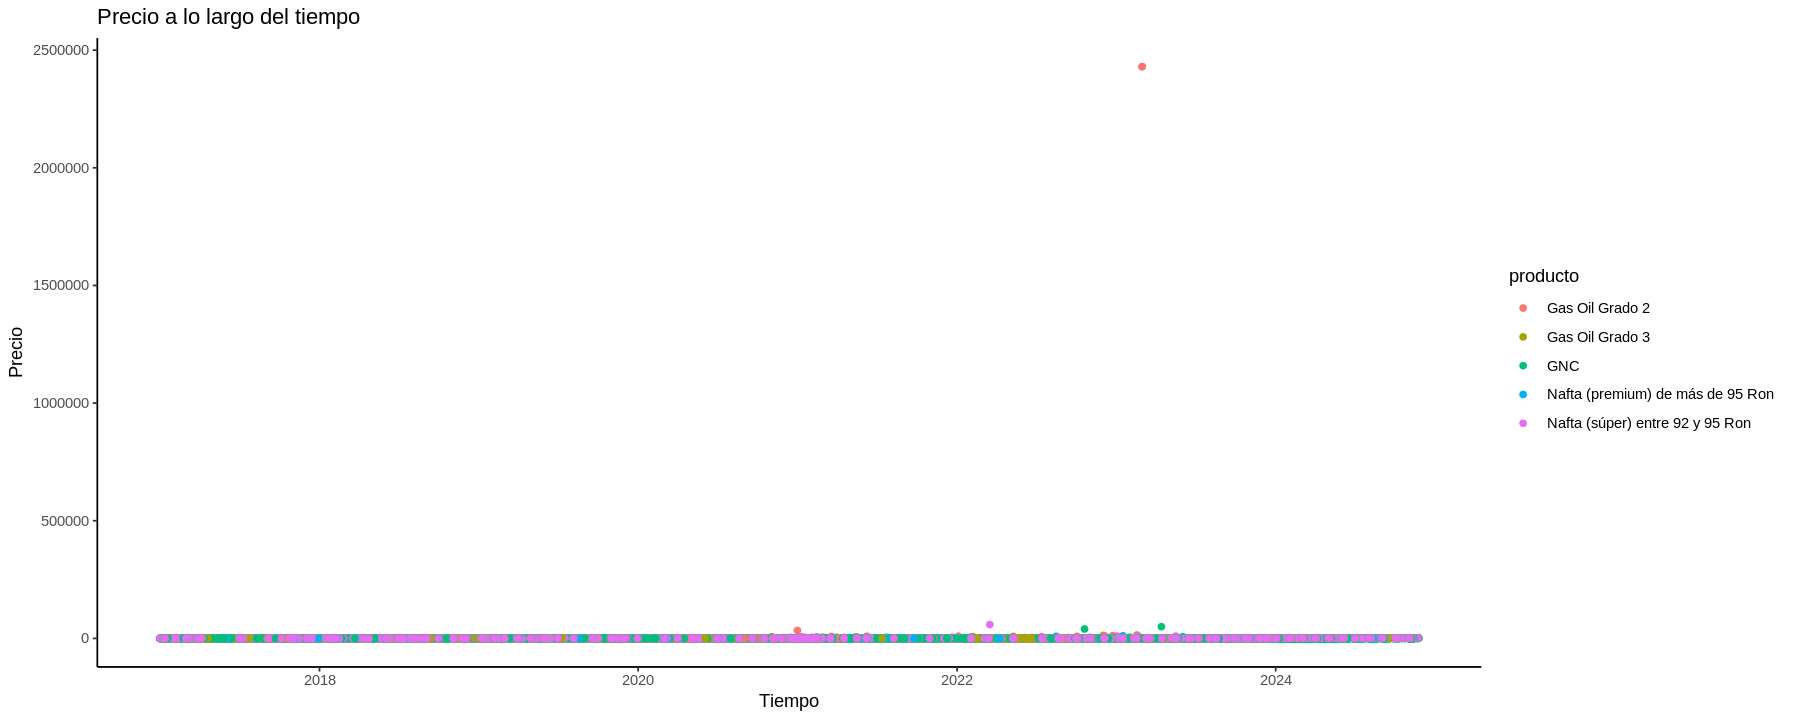

In [ ]:
# graficamos para detectar outliers

ggplot(historicos, aes(x=fecha, y=precio, color=producto)) +
  geom_point() +
  labs(
    title='Precio a lo largo del tiempo',
    x='Tiempo',
    y="Precio"
  ) +
    theme_classic()

In [ ]:
# eliminamos los outliers severos

historicos <- historicos %>%
    mutate(anio = year(fecha), mes = month(fecha)) %>%
    group_by(producto, provincia, anio, mes) %>%
    mutate(
        Q1 = quantile(precio, 0.25),
        Q3 = quantile(precio, 0.75),
        IQR = Q3 - Q1,
        lower_limit = Q1 - 3 * IQR,
        upper_limit = Q3 + 3 * IQR
    ) %>%
    filter(precio >= lower_limit & precio <= upper_limit) %>%
    select(-Q1, -Q3, -IQR, -lower_limit, -upper_limit) %>%
    ungroup()

historicos <- historicos %>%
    select(-anio, -mes) %>%
    arrange(fecha)

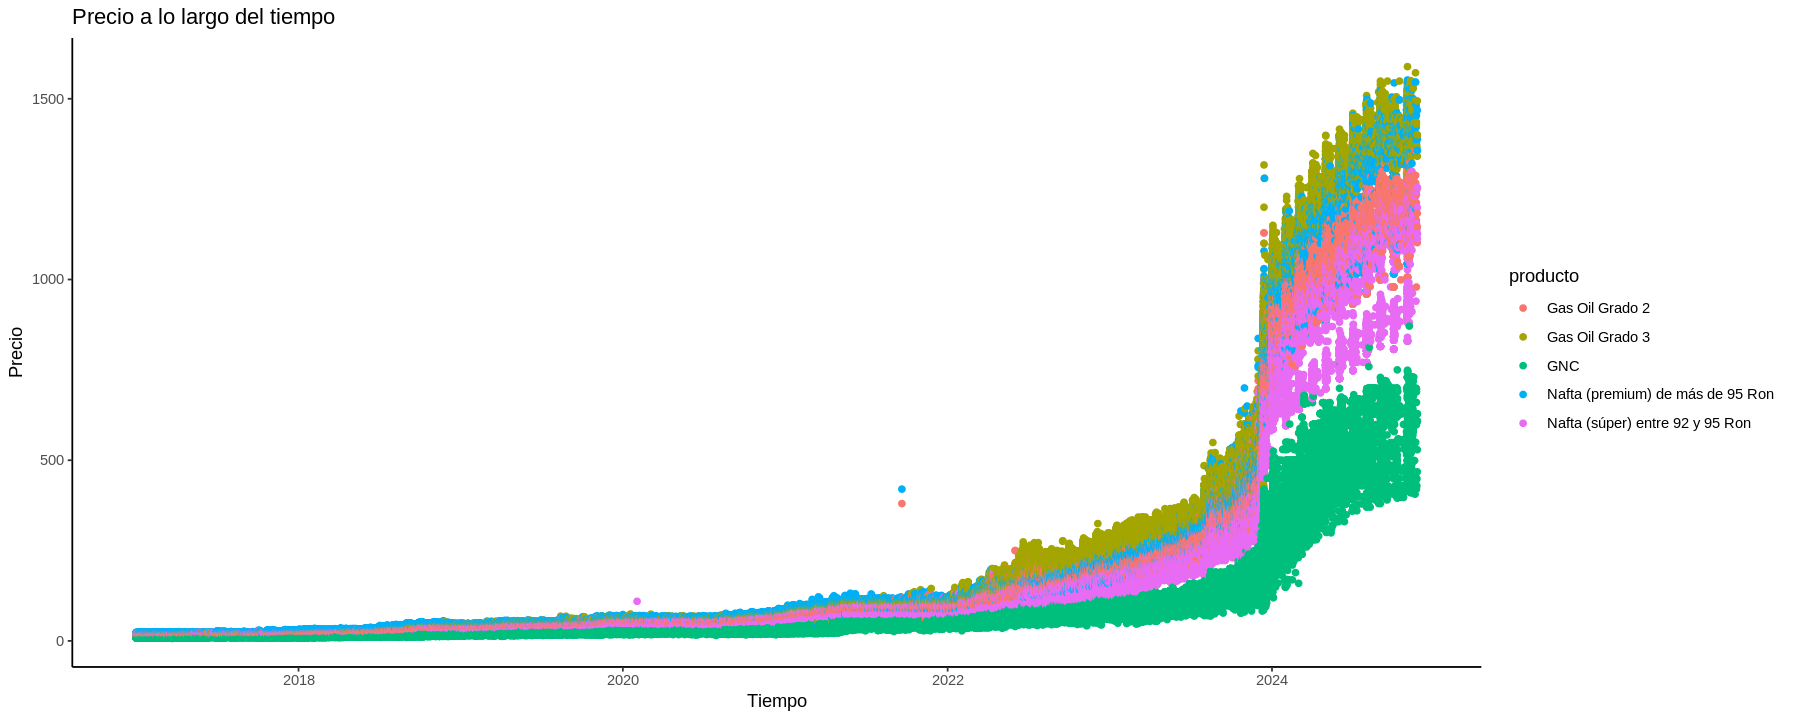

In [ ]:
# graficamos devuelta para detectar outliers residuales

ggplot(historicos, aes(x=fecha, y=precio, color=producto)) +
  geom_point() +
  labs(
    title='Precio a lo largo del tiempo',
    x='Tiempo',
    y="Precio"
  ) +
    theme_classic()

In [ ]:
# eliminamos los outliers residuales

historicos <- historicos %>%
    filter( !((year(fecha) == 2021 & precio > 250) | (year(fecha) == 2020 & precio > 100)))

In [ ]:
head(historicos)

direccion,localidad,provincia,producto,empresabandera,latitud,longitud,fecha,precio
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<date>,<dbl>
12 DE OCTUBRE 539,JACINTO ARAUZ,LA PAMPA,Gas Oil Grado 2,BLANCA,-38.08858,-63.42783,2017-01-01,15.900
12 DE OCTUBRE 539,JACINTO ARAUZ,LA PAMPA,Gas Oil Grado 3,BLANCA,-38.08858,-63.42783,2017-01-01,18.500
12 DE OCTUBRE 539,JACINTO ARAUZ,LA PAMPA,Nafta (súper) entre 92 y 95 Ron,BLANCA,-38.08858,-63.42783,2017-01-01,15.500
13 1398,LA PLATA,BUENOS AIRES,GNC,GULF,-34.93582,-57.93558,2017-01-01,9.999
13 1398,LA PLATA,BUENOS AIRES,Nafta (súper) entre 92 y 95 Ron,GULF,-34.93582,-57.93558,2017-01-01,21.850
44 Y 159,LA PLATA,BUENOS AIRES,GNC,BLANCA,-34.95986,-58.00878,2017-01-01,9.150


In [ ]:
str(historicos)

tibble [1,375,915 × 9] (S3: tbl_df/tbl/data.frame)
 $ direccion     : chr [1:1375915] "12 DE OCTUBRE 539" "12 DE OCTUBRE 539" "12 DE OCTUBRE 539" "13 1398" ...
 $ localidad     : chr [1:1375915] "JACINTO ARAUZ" "JACINTO ARAUZ" "JACINTO ARAUZ" "LA PLATA" ...
 $ provincia     : chr [1:1375915] "LA PAMPA" "LA PAMPA" "LA PAMPA" "BUENOS AIRES" ...
 $ producto      : chr [1:1375915] "Gas Oil Grado 2" "Gas Oil Grado 3" "Nafta (súper) entre 92 y 95 Ron" "GNC" ...
 $ empresabandera: chr [1:1375915] "BLANCA" "BLANCA" "BLANCA" "GULF" ...
 $ latitud       : num [1:1375915] -38.1 -38.1 -38.1 -34.9 -34.9 ...
 $ longitud      : num [1:1375915] -63.4 -63.4 -63.4 -57.9 -57.9 ...
 $ fecha         : Date[1:1375915], format: "2017-01-01" "2017-01-01" ...
 $ precio        : num [1:1375915] 15.9 18.5 15.5 10 21.9 ...


In [ ]:
write_parquet(historicos, 'surtidor_historicos.parquet')

In [ ]:
write_csv_arrow(historicos, 'surtidor_historicos.csv')